# Exploratory Data Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
ls

 Volume in drive C is New Volume
 Volume Serial Number is 24F0-9997

 Directory of C:\Project\practice\Projects\Job Analysis

09/11/2020  03:10 AM    <DIR>          .
09/11/2020  03:10 AM    <DIR>          ..
09/11/2020  03:10 AM    <DIR>          .ipynb_checkpoints
09/06/2020  12:21 AM         3,077,535 Cleaned_dataset.csv
09/06/2020  12:24 AM            56,074 Data Cleaning.ipynb
09/11/2020  03:10 AM                72 EDA.ipynb
09/05/2020  02:57 AM         4,181,032 glassdoor_ds_data.csv
09/04/2020  02:36 AM             8,692 glassdoor_scraper.py
09/05/2020  03:01 AM            65,144 scraper.ipynb
               6 File(s)      7,388,549 bytes
               3 Dir(s)  239,986,749,440 bytes free


In [3]:
df = pd.read_csv('Cleaned_dataset.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,company_txt,age,python_yn,R_yn,spark,aws,excel
0,0,Software Engineer - Data Science,$60K-$127K (Glassdoor est.),Join ClearEdge and be a part of the team of me...,4.1,ClearEdge\n4.1,"Annapolis Junction, MD",51 to 200 Employees,2002,Company - Private,...,60,127,93.5,ClearEdge\n,18,1,0,1,0,1
1,1,Quality Systems Data Science Engineer,$60K-$127K (Glassdoor est.),It is our people behind life’s passions who wi...,3.7,Mercury Marine\n3.7,"Fond du Lac, WI",1001 to 5000 Employees,1939,Company - Public,...,60,127,93.5,Mercury Marine\n,81,0,0,0,0,1
2,2,Inside Sales Representative (Headquarters),$60K-$127K (Glassdoor est.),Becoming a Sales Professional at Red Ventures ...,2.5,Red Ventures - Sales\n2.5,"Charlotte, NC",1001 to 5000 Employees,2000,Company - Private,...,60,127,93.5,Red Ventures - Sales\n,20,0,0,0,0,0
3,3,Data Scientist,$60K-$127K (Glassdoor est.),Braxton Technologies is looking for a data sci...,1.6,Braxton Science & Technology Group\n1.6,"Colorado Springs, CO",51 to 200 Employees,-1,Company - Private,...,60,127,93.5,Braxton Science & Technology Group\n,-1,1,0,1,0,1
4,4,Data Science Engineer Full Stack - AI,$60K-$127K (Glassdoor est.),Data Science Engineer Full Stack - AI\n\nOverv...,2.8,BryterCX\n2.8,United States,51 to 200 Employees,2000,Company - Private,...,60,127,93.5,BryterCX\n,20,1,0,1,0,1


In [4]:
# Custom function for title simplifying
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [5]:
# Custom function for define seniority  
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
###>>>>>>>>>Steps<<<<<<<<<<###

## Job title and seniority 

##  Job description length 

## hourly wage to annual 

#remove new line from job title

### Job title & seniority labeling

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    304
na                151
analyst           130
data engineer      73
mle                51
manager            35
director           16
Name: job_simp, dtype: int64

WE can see, there some na labels. We should eliminate those later.

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        598
senior    162
Name: seniority, dtype: int64

- Opps! no job for junior level :(  <br>
- A lot of na labels -_-

### Job description length count

In [9]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      4564
1      2836
2      3157
3      3695
4      2899
       ... 
755    3996
756    4022
757    3230
758    2681
759    4220
Name: desc_len, Length: 760, dtype: int64

In [10]:
df['desc_len'].mean()   # Average description length

3782.221052631579

### Fix hourly wage in salary

<img src='https://www.patriotsoftware.com/wp-content/uploads/2019/12/hourly_to_salary_75023.2.jpg' height=300 width=300>

In [11]:
#hourly wage to annual (hourly_wage*2000=Annual salay roughly)

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [13]:
df[df.hourly==0][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,60,127
1,0,60,127
2,0,60,127
3,0,60,127
4,0,60,127
...,...,...,...
755,0,229,350
756,0,229,350
757,0,229,350
758,0,229,350


In [14]:
df.shape

(760, 28)

Ow! We don't have any hourly wage. Let's remove hourly column then.

In [15]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [18]:
df.drop(columns=['Unnamed: 0','hourly'],inplace=True)

In [19]:
df.shape

(760, 26)

### Removing /n for job title

In [20]:
df['company_txt']

0                               ClearEdge\n
1                          Mercury Marine\n
2                    Red Ventures - Sales\n
3      Braxton Science & Technology Group\n
4                                BryterCX\n
                       ...                 
755                              1010data\n
756                     National Grid USA\n
757                                Tapjoy\n
758         Raytheon Intelligence & Space\n
759                         ConsumerTrack\n
Name: company_txt, Length: 760, dtype: object

In [21]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [22]:
df['company_txt']

0                               ClearEdge
1                          Mercury Marine
2                    Red Ventures - Sales
3      Braxton Science & Technology Group
4                                BryterCX
                      ...                
755                              1010data
756                     National Grid USA
757                                Tapjoy
758         Raytheon Intelligence & Space
759                         ConsumerTrack
Name: company_txt, Length: 760, dtype: object

## Analysis

In [23]:
df.describe()

,Rating,Founded,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,desc_len
count,760.000000,760.000000,760.0,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.728026,1788.372368,0.0,82.117105,139.852632,110.984868,29.427632,0.646053,0.009211,0.225000,0.282895,0.475000,3782.221053
std,0.948498,597.701045,0.0,36.006561,52.906504,44.222340,33.456322,0.478508,0.095591,0.417857,0.450702,0.499703,1575.904251
min,-1.000000,-1.000000,0.0,30.000000,56.000000,45.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000
25%,3.400000,1960.750000,0.0,64.000000,120.000000,93.500000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2742.000000
50%,3.800000,1996.000000,0.0,80.000000,132.000000,106.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3579.000000
75%,4.300000,2008.000000,0.0,85.000000,165.000000,126.500000,38.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4625.500000
max,5.000000,2020.000000,0.0,229.000000,350.000000,289.500000,221.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11406.000000


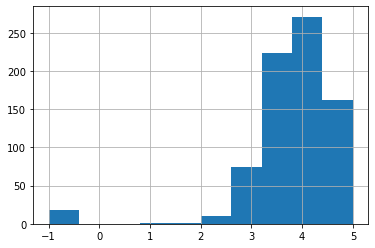

In [24]:
df.Rating.hist()

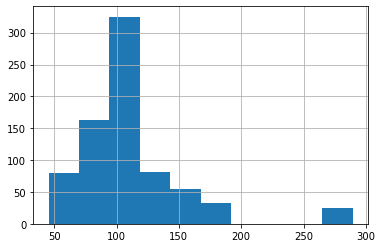

In [25]:
df.avg_salary.hist()

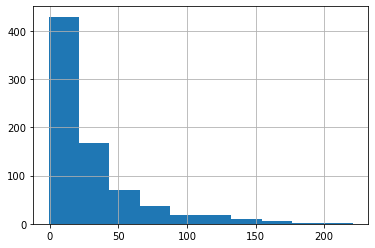

In [26]:
df.age.hist()

Age has exponential shape, it's not normal distribution. We may have to fix this. Since, linear regression deals with normal distribution.

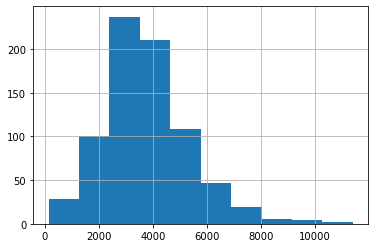

In [28]:
df.desc_len.hist()

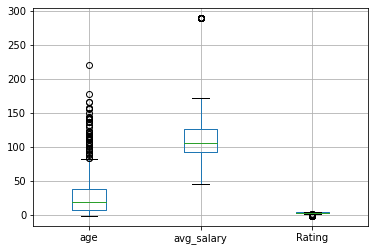

In [29]:
df.boxplot(column = ['age','avg_salary','Rating'])

Something wrong with rating!

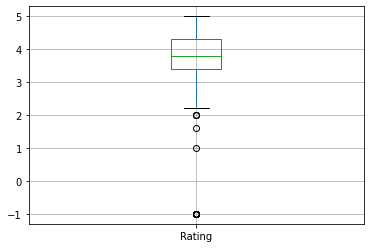

In [30]:
df.boxplot(column = 'Rating')

Oh! There are some outliers

In [31]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.007111,0.030711,0.211097
avg_salary,0.007111,1.000000,-0.059034,0.030633
Rating,0.030711,-0.059034,1.000000,0.048675
desc_len,0.211097,0.030633,0.048675,1.000000


Let's visualize to understand correlation better

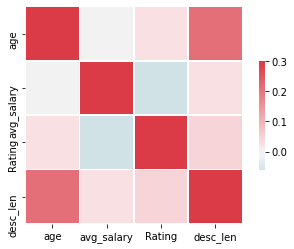

In [33]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There are good correlation with age and desc length!